| 🔹 Column Name | 📘 Description                               |
| -------------- | -------------------------------------------- |
| Density        | Density determined from underwater weighing  |
| BodyFat        | Percent body fat from Siri's (1956) equation |
| Age            | Age (years)                                  |
| Weight         | Weight (lbs)                                 |
| Height         | Height (inches)                              |
| Neck           | Neck circumference (cm)                      |
| Chest          | Chest circumference (cm)                     |
| Abdomen        | Abdomen 2 circumference (cm)                 |
| Hip            | Hip circumference (cm)                       |
| Thigh          | Thigh circumference (cm)                     |
| Knee           | Knee circumference (cm)                      |
| Ankle          | Ankle circumference (cm)                     |
| Biceps         | Biceps circumference (cm) — relaxed          |
| Forearm        | Forearm circumference (cm)                   |
| Wrist          | Wrist circumference (cm)                     |


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [163]:
df =pd.read_csv('/content/bodyfat.csv')
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [164]:
df.info() # No NaN Values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [165]:
df.describe()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


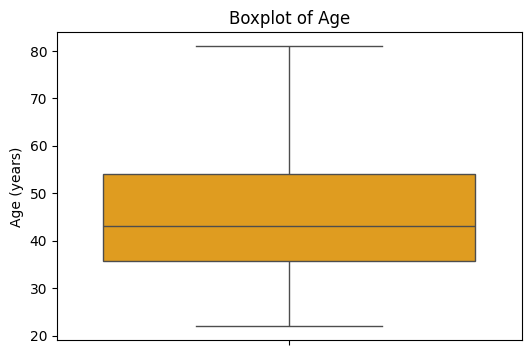

In [167]:
# Boxplot for Age
plt.figure(figsize=(6, 4))
sns.boxplot(y='Age', data=df, color='orange')
plt.title('Boxplot of Age')
plt.ylabel('Age (years)')
plt.show()

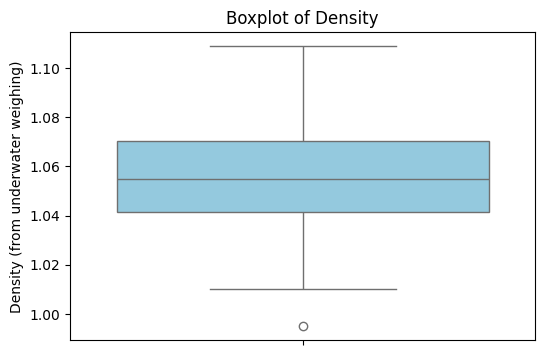

In [168]:
# Boxplot for Density
plt.figure(figsize=(6, 4))
sns.boxplot(y='Density', data=df, color='skyblue')
plt.title('Boxplot of Density')
plt.ylabel('Density (from underwater weighing)')
plt.show()

In [169]:
# Step 1: Calculate IQR for 'Density'
Q1 = df['Density'].quantile(0.25)
Q3 = df['Density'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Extract actual outlier values
outliers = df[(df['Density'] < lower_bound) | (df['Density'] > upper_bound)]

# Step 4: Display outlier values
outliers[['Density']]


,Density
215,0.995


In [170]:
df['Density'].mean()

np.float64(1.0555738095238094)

In [171]:
df['Density'] = df['Density'].apply(lambda x: 1.0555 if x < lower_bound or x > upper_bound else x)  # Replacing outliers with mean

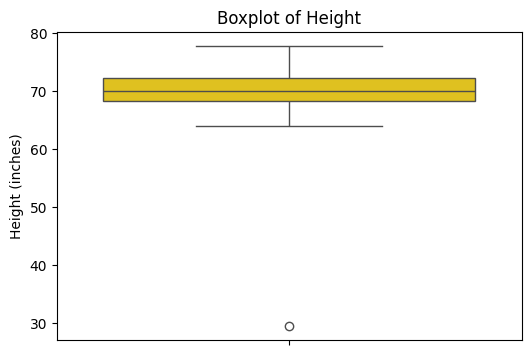

In [172]:
plt.figure(figsize=(6, 4))
sns.boxplot(y='Height', data=df, color='gold')
plt.title('Boxplot of Height')
plt.ylabel('Height (inches)')
plt.show()

In [173]:
Q1 = df['Height'].quantile(0.25)
Q3 = df['Height'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Height'] < lower_bound) | (df['Height'] > upper_bound)]

outliers[['Height']]

,Height
41,29.5


In [174]:
df['Height'].mean()


np.float64(70.14880952380952)

In [175]:
df['Height'] = df['Height'].apply(lambda x: 70.1488 if x < lower_bound or x > upper_bound else x)  # Replacing outliers with mean

In [176]:
#For more convineance conerting lbs to weight
# Convert weight from lbs to kg
df["Weight"] = df["Weight"] * 0.453592

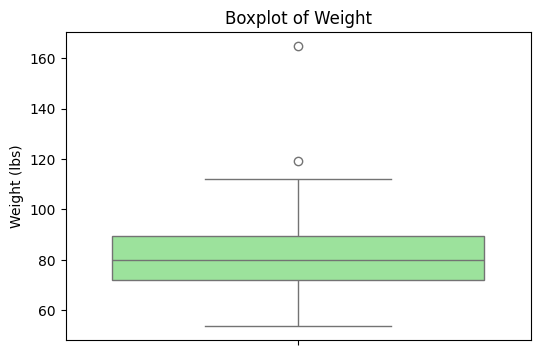

In [177]:
plt.figure(figsize=(6, 4))
sns.boxplot(y='Weight', data=df, color='lightgreen')
plt.title('Boxplot of Weight')
plt.ylabel('Weight (lbs)')
plt.show()

In [178]:
Q1 = df['Weight'].quantile(0.25)
Q3 = df['Weight'].quantile(0.75)
IQR = Q3 - Q1

# Step 3: Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 4: Extract actual outlier values
outliers = df[(df['Weight'] < lower_bound) | (df['Weight'] > upper_bound)]

# Step 5: Display outlier values
outliers[['Weight']]

,Weight
38,164.721935
40,119.181298


In [179]:
mean_weight = df['Weight'].mean()

In [180]:
df['Weight'] = df['Weight'].apply(lambda x: mean_weight if x < lower_bound or x > upper_bound else x)  # Replacing outliers with mean

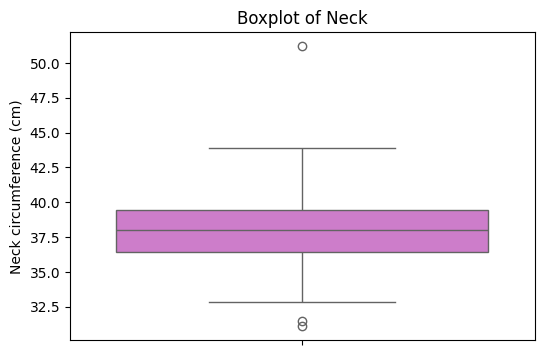

In [181]:
plt.figure(figsize=(6, 4))
sns.boxplot(y='Neck', data=df, color='orchid')
plt.title('Boxplot of Neck')
plt.ylabel('Neck circumference (cm)')
plt.show()


In [182]:
Q1 = df['Neck'].quantile(0.25)
Q3 = df['Neck'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Neck'] < lower_bound) | (df['Neck'] > upper_bound)]

outliers[['Neck']]


,Neck
38,51.2
44,31.5
105,31.1


In [183]:
df['Neck'].mean()

np.float64(37.992063492063494)

In [184]:
df['Neck'] = df['Neck'].apply(lambda x: 37.992 if x < lower_bound or x > upper_bound else x)

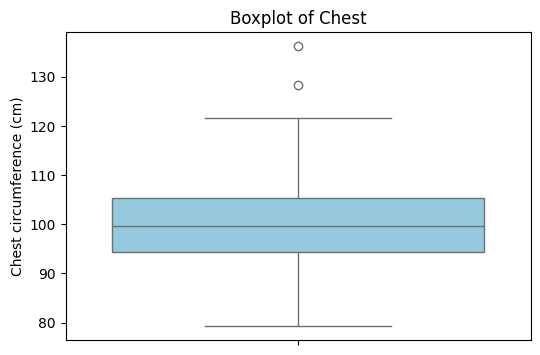

In [185]:
# 📊 Boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(y='Chest', data=df, color='skyblue')
plt.title('Boxplot of Chest')
plt.ylabel('Chest circumference (cm)')
plt.show()

In [186]:
# 📐 IQR Outlier Detection
Q1 = df['Chest'].quantile(0.25)
Q3 = df['Chest'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Chest'] < lower_bound) | (df['Chest'] > upper_bound)]
outliers[['Chest']]

,Chest
38,136.2
40,128.3


In [187]:
mean_val = df['Chest'].mean()
mean_val

np.float64(100.82420634920635)

In [188]:

df['Chest'] = df['Chest'].apply(lambda x: mean_val if x < lower_bound or x > upper_bound else x)

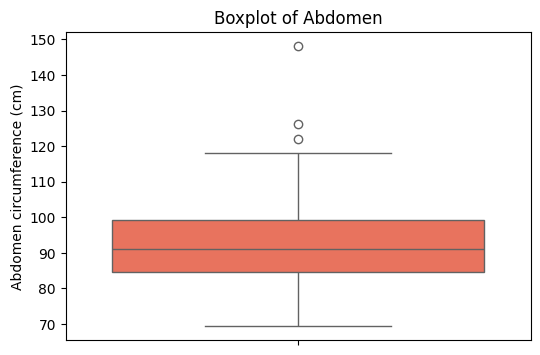

In [189]:
plt.figure(figsize=(6, 4))
sns.boxplot(y='Abdomen', data=df, color='tomato')
plt.title('Boxplot of Abdomen')
plt.ylabel('Abdomen circumference (cm)')
plt.show()

In [190]:
Q1 = df['Abdomen'].quantile(0.25)
Q3 = df['Abdomen'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Abdomen'] < lower_bound) | (df['Abdomen'] > upper_bound)]
outliers[['Abdomen']]

,Abdomen
38,148.1
40,126.2
215,122.1


In [191]:
mean_val = df['Abdomen'].mean()

In [192]:

df['Abdomen'] = df['Abdomen'].apply(lambda x: mean_val if x < lower_bound or x > upper_bound else x)

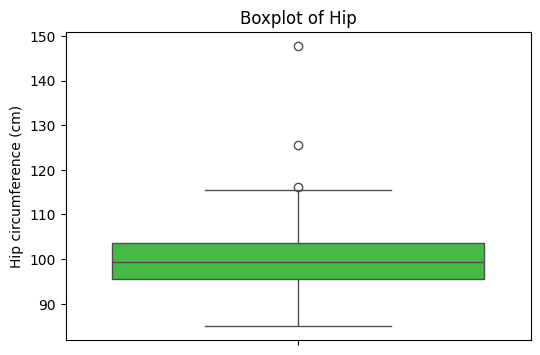

In [193]:
plt.figure(figsize=(6, 4))
sns.boxplot(y='Hip', data=df, color='limegreen')
plt.title('Boxplot of Hip')
plt.ylabel('Hip circumference (cm)')
plt.show()

In [195]:
Q1 = df['Hip'].quantile(0.25)
Q3 = df['Hip'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Hip'] < lower_bound) | (df['Hip'] > upper_bound)]
outliers[['Hip']]

,Hip
34,116.1
38,147.7
40,125.6


In [196]:
mean_val = df['Hip'].mean()

In [197]:

df['Hip'] = df['Hip'].apply(lambda x: mean_val if x < lower_bound or x > upper_bound else x)

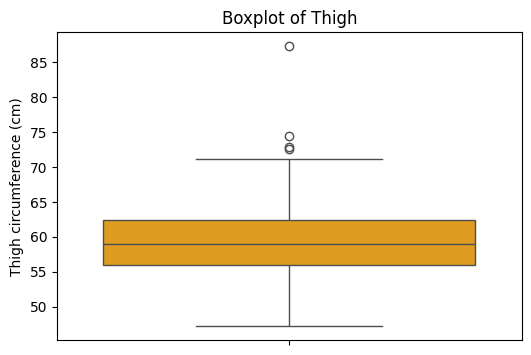

In [198]:
plt.figure(figsize=(6, 4))
sns.boxplot(y='Thigh', data=df, color='orange')
plt.title('Boxplot of Thigh')
plt.ylabel('Thigh circumference (cm)')
plt.show()

In [199]:
Q1 = df['Thigh'].quantile(0.25)
Q3 = df['Thigh'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Thigh'] < lower_bound) | (df['Thigh'] > upper_bound)]
outliers[['Thigh']]

,Thigh
38,87.3
40,72.5
151,72.9
168,74.4


In [200]:
mean_val = df['Thigh'].mean()

In [201]:
df['Thigh'] = df['Thigh'].apply(lambda x: mean_val if x < lower_bound or x > upper_bound else x)

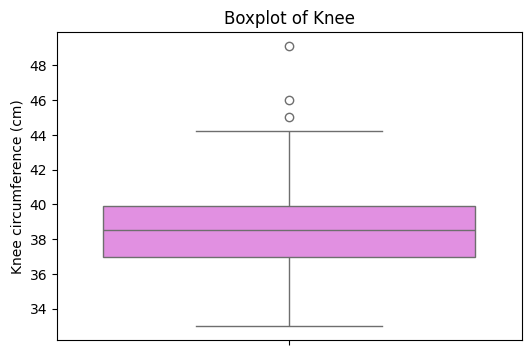

In [202]:
plt.figure(figsize=(6, 4))
sns.boxplot(y='Knee', data=df, color='violet')
plt.title('Boxplot of Knee')
plt.ylabel('Knee circumference (cm)')
plt.show()

In [203]:
Q1 = df['Knee'].quantile(0.25)
Q3 = df['Knee'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Knee'] < lower_bound) | (df['Knee'] > upper_bound)]
outliers[['Knee']]

,Knee
38,49.1
191,45.0
243,46.0


In [204]:
mean_val = df['Knee'].mean()

In [205]:

df['Knee'] = df['Knee'].apply(lambda x: mean_val if x < lower_bound or x > upper_bound else x)

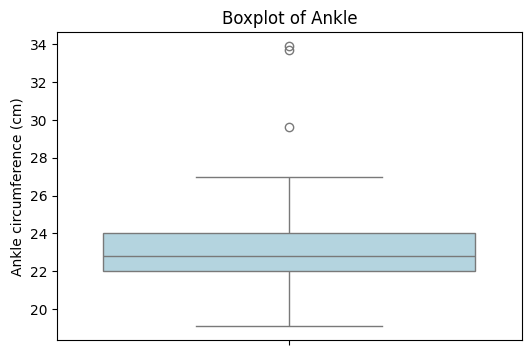

In [206]:
plt.figure(figsize=(6, 4))
sns.boxplot(y='Ankle', data=df, color='lightblue')
plt.title('Boxplot of Ankle')
plt.ylabel('Ankle circumference (cm)')
plt.show()

In [207]:
Q1 = df['Ankle'].quantile(0.25)
Q3 = df['Ankle'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Ankle'] < lower_bound) | (df['Ankle'] > upper_bound)]
outliers[['Ankle']]

,Ankle
30,33.9
38,29.6
85,33.7


In [208]:
mean_val = df['Ankle'].mean()

In [209]:

df['Ankle'] = df['Ankle'].apply(lambda x: mean_val if x < lower_bound or x > upper_bound else x)

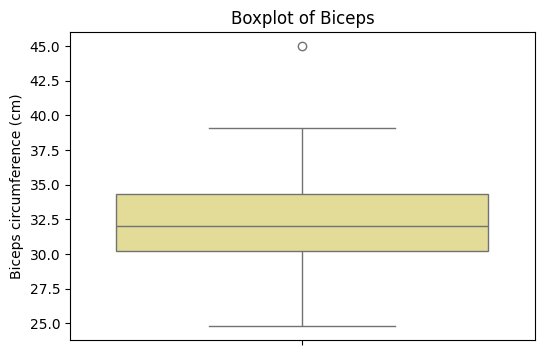

In [210]:
plt.figure(figsize=(6, 4))
sns.boxplot(y='Biceps', data=df, color='khaki')
plt.title('Boxplot of Biceps')
plt.ylabel('Biceps circumference (cm)')
plt.show()

In [211]:
Q1 = df['Biceps'].quantile(0.25)
Q3 = df['Biceps'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Biceps'] < lower_bound) | (df['Biceps'] > upper_bound)]
outliers[['Biceps']]

,Biceps
38,45.0


In [212]:
mean_val = df['Biceps'].mean()

In [213]:

df['Biceps'] = df['Biceps'].apply(lambda x: mean_val if x < lower_bound or x > upper_bound else x)

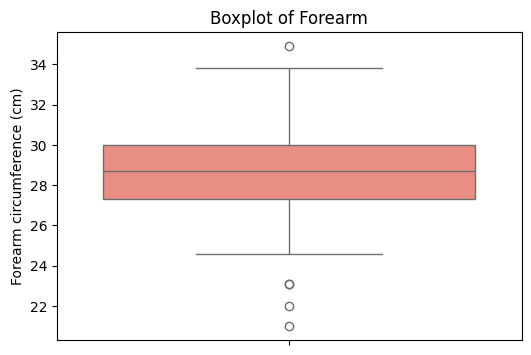

In [214]:
plt.figure(figsize=(6, 4))
sns.boxplot(y='Forearm', data=df, color='salmon')
plt.title('Boxplot of Forearm')
plt.ylabel('Forearm circumference (cm)')
plt.show()

In [215]:
Q1 = df['Forearm'].quantile(0.25)
Q3 = df['Forearm'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Forearm'] < lower_bound) | (df['Forearm'] > upper_bound)]
outliers[['Forearm']]

,Forearm
44,23.1
158,34.9
174,21.0
205,23.1
225,22.0


In [216]:
mean_val = df['Forearm'].mean()

In [217]:

df['Forearm'] = df['Forearm'].apply(lambda x: mean_val if x < lower_bound or x > upper_bound else x)

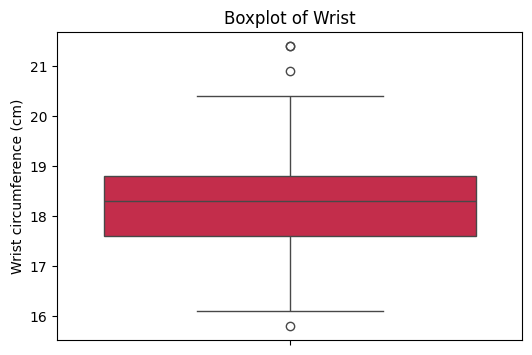

In [218]:
plt.figure(figsize=(6, 4))
sns.boxplot(y='Wrist', data=df, color='crimson')
plt.title('Boxplot of Wrist')
plt.ylabel('Wrist circumference (cm)')
plt.show()

In [219]:
Q1 = df['Wrist'].quantile(0.25)
Q3 = df['Wrist'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Wrist'] < lower_bound) | (df['Wrist'] > upper_bound)]
outliers[['Wrist']]

,Wrist
38,21.4
40,21.4
225,15.8
251,20.9


In [220]:
mean_val = df['Wrist'].mean()

In [221]:

df['Wrist'] = df['Wrist'].apply(lambda x: mean_val if x < lower_bound or x > upper_bound else x)

In [222]:
X = df.drop(columns=['BodyFat'])
y = df['BodyFat']

In [223]:
X.head()

,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,23,69.966566,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,22,78.584814,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,22,69.853168,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,26,83.801122,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,24,83.574326,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [224]:
y.head()

,BodyFat
0,12.3
1,6.1
2,25.3
3,10.4
4,28.7


In [225]:
X.shape , y.shape

((252, 14), (252,))

In [226]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [227]:
X_train.shape, y_train.shape

((201, 14), (201,))

In [228]:
X_test.shape, y_test.shape

((51, 14), (51,))

In [229]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [230]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(n_jobs=-1)
lr.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [ ]:
lr.coef_[0]

np.float64(-46.841396690845706)

In [231]:
coeff = pd.DataFrame({
    'columns': X.columns,
    'weights': lr.coef_
})
coeff

,columns,weights
0,Density,-37.796379
1,Age,2.789782
2,Weight,16.311627
3,Height,-4.745005
4,Neck,1.386656
5,Chest,2.649670
6,Abdomen,-12.237880
7,Hip,5.323348
8,Thigh,-0.382146
9,Knee,-3.791264


In [232]:
y_pred_test = lr.predict(X_test)

In [233]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mean_squared_error(y_test,y_pred_test)

1.1225089803007573

In [234]:
mean_absolute_error(y_test,y_pred_test)

0.8651510203302077

In [235]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)

Lasso(alpha=0.01)

In [236]:
coeff = pd.DataFrame({
    'columns': X.columns,
    'weights': lasso.coef_
})
coeff

,columns,weights
0,Density,-35.770795
1,Age,1.812192
2,Weight,6.418202
3,Height,-2.998332
4,Neck,0.373352
5,Chest,3.262807
6,Abdomen,-4.611511
7,Hip,4.950681
8,Thigh,-0.000000
9,Knee,-3.059851


In [237]:
y_lasso_pred_test = lasso.predict(X_test)

In [238]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mean_squared_error(y_test,y_lasso_pred_test)

0.7125490407783429

In [239]:
mean_absolute_error(y_test,y_lasso_pred_test)

0.7057018762990672

In [240]:
param_grid = {'alpha':[0.01,0.1,1,10,100]}

In [241]:
from sklearn.model_selection import GridSearchCV
grid_serach_cv = GridSearchCV(lasso,
                              param_grid,
                              scoring='neg_median_absolute_error',
                              n_jobs=-1,
                              cv=5)

In [242]:
grid_serach_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(alpha=0.01), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
             scoring='neg_median_absolute_error')

In [243]:
grid_serach_cv.best_params_

{'alpha': 0.01}

In [244]:
scaler

MinMaxScaler()

In [245]:
lasso

Lasso(alpha=0.01)

In [246]:
import joblib
joblib.dump(lasso, 'lasso_model.joblib')
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']

In [256]:
X.head()

,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,23,69.966566,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,22,78.584814,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,22,69.853168,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,26,83.801122,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,24,83.574326,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [257]:
y.head()

,BodyFat
0,12.3
1,6.1
2,25.3
3,10.4
4,28.7


In [262]:

sample_input = {
    'Density': 1.0853,
    'Age': 22,
    'Weight': 78.584814,
    'Height': 72.25,
    'Neck': 38.5,
    'Chest': 93.6,
    'Abdomen': 83.0,
    'Hip': 98.7,
    'Thigh': 58.7,
    'Knee': 37.3,
    'Ankle': 23.4,
    'Biceps': 30.5,
    'Forearm': 28.9,
    'Wrist': 18.2
}


In [263]:
sample_data = pd.DataFrame([sample_input])
sample_data

,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0853,22,78.584814,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2


In [264]:
scaled_data = scaler.transform(sample_data)
scaled_data

array([[0.74037404, 0.        , 0.42524272, 0.6       , 0.51351351,
        0.33806147, 0.27983539, 0.44918033, 0.47916667, 0.38392857,
        0.5443038 , 0.37681159, 0.4673913 , 0.46341463]])

In [265]:
lasso.predict(scaled_data)

array([6.86836124])

In [268]:
def predict_Fat(d):
    sample_data = pd.DataFrame([d])
    scaled_data = scaler.transform(sample_data)
    pred = lasso.predict(scaled_data)
    return pred

In [269]:
pred = predict_Fat(sample_input)
pred

array([6.86836124])